In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('text', usetex=False)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
data=pd.read_csv('data.csv')
data

,target,x1,x2
0,0,1,5
1,0,1,4
2,0,2,5
3,0,2,4
4,0,3,3
5,1,3,2
6,1,3,1
7,1,4,1
8,1,5,1
9,1,6,1


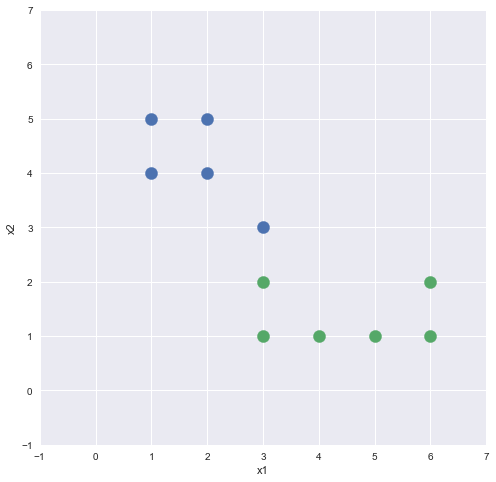

In [6]:
fig1, axes1 = plt.subplots(figsize=(8, 8))

# axes1.axis('equal')
axes1.set_xlim([-1, 7])
axes1.set_ylim([-1, 7])

axes1.set_xlabel('x1')
axes1.set_ylabel('x2')

axes1.scatter(data[data.target == 0].x1.values, data[
    data.target == 0].x2.values, s=150,)
axes1.scatter(data[data.target == 1].x1.values, data[
    data.target == 1].x2.values, s=150,)

fig1.savefig('org_data.png')

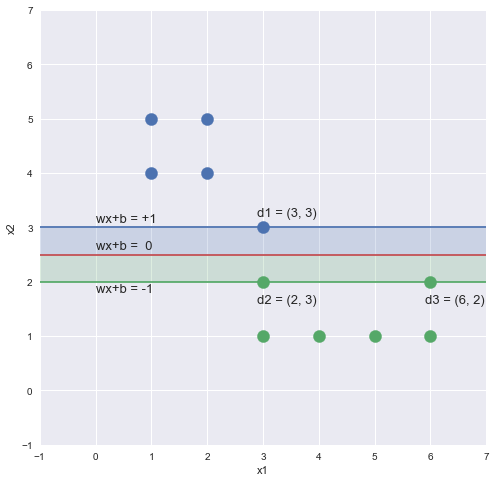

In [23]:
fig1, axes1 = plt.subplots(figsize=(8, 8))

# axes1.axis('equal')
axes1.set_xlim([-1, 7])
axes1.set_ylim([-1, 7])

axes1.set_xlabel('x1')
axes1.set_ylabel('x2')

sct1 = axes1.scatter(data[data.target == 0].x1.values, data[
    data.target == 0].x2.values, s=150,)
sct2 = axes1.scatter(data[data.target == 1].x1.values, data[
    data.target == 1].x2.values, s=150,)

xs = np.linspace(-2, 10)

axes1.plot(xs, np.ones_like(xs) * 3)
axes1.plot(xs, np.ones_like(xs) * 2)
axes1.plot(xs, np.ones_like(xs) * 2.5)

axes1.fill_between(xs, np.ones_like(xs) * 2.5, np.ones_like(xs)
                   * 2, color=sct2.get_facecolor()[0], alpha=0.2)
axes1.fill_between(xs, np.ones_like(xs) * 2.5, np.ones_like(xs)
                   * 3, color=sct1.get_facecolor()[0], alpha=0.2)


axes1.annotate(xy=[0, 3.1], s='wx+b = +1', size=13)
axes1.annotate(xy=[0, 2.6], s='wx+b =  0', size=13)
axes1.annotate(xy=[0, 1.8], s='wx+b = -1', size=13)

axes1.annotate(xy=[2.9, 3.2], s='d1 = (3, 3)', size=13)
axes1.annotate(xy=[2.9, 1.6], s='d2 = (2, 3)', size=13)
axes1.annotate(xy=[5.9, 1.6], s='d3 = (6, 2)', size=13)


fig1.savefig('margin_1.png')

In [ ]:
import sklearn.svm as svm


svm1 = svm.SVC(C=1e10, kernel='linear')
svm1.fit(data[['x1', 'x2']].values, data['target'].values)

w = svm1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - svm1.intercept_[0] / w[1]


fig1, axes1 = plt.subplots(figsize=(8, 8))

# axes1.axis('equal')
axes1.set_xlim([-1, 7])
axes1.set_ylim([-1, 7])

axes1.set_xlabel('x1')
axes1.set_ylabel('x2')

axes1.scatter(data[data.target == 0].x1.values, data[
    data.target == 0].x2.values, s=150,)
axes1.scatter(data[data.target == 1].x1.values, data[
    data.target == 1].x2.values, s=150)

axes1.scatter(data.iloc[svm1.support_].x1.values, data.iloc[
    svm1.support_].x2.values, color='yellow')

axes1.plot(xx, yy)
fig1.savefig('svm_c_big.png')

In [ ]:
svm1 = svm.SVC(C=1, kernel='linear')
svm1.fit(data[['x1', 'x2']].values, data['target'].values)

w = svm1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - svm1.intercept_[0] / w[1]


fig1, axes1 = plt.subplots(figsize=(8, 8))

# axes1.axis('equal')
axes1.set_xlim([-1, 7])
axes1.set_ylim([-1, 7])

axes1.set_xlabel('x1')
axes1.set_ylabel('x2')

axes1.scatter(data[data.target == 0].x1.values, data[
    data.target == 0].x2.values, s=150,)
axes1.scatter(data[data.target == 1].x1.values, data[
    data.target == 1].x2.values, s=150)

axes1.scatter(data.iloc[svm1.support_].x1.values, data.iloc[
    svm1.support_].x2.values, color='yellow')

axes1.plot(xx, yy)
fig1.savefig('svm_c_medium.png')

In [ ]:
svm1 = svm.SVC(C=.1, kernel='linear')
svm1.fit(data[['x1', 'x2']].values, data['target'].values)

w = svm1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - svm1.intercept_[0] / w[1]


fig1, axes1 = plt.subplots(figsize=(8, 8))

# axes1.axis('equal')
axes1.set_xlim([-1, 7])
axes1.set_ylim([-1, 7])

axes1.set_xlabel('x1')
axes1.set_ylabel('x2')

axes1.scatter(data[data.target == 0].x1.values, data[
    data.target == 0].x2.values, s=150,)
axes1.scatter(data[data.target == 1].x1.values, data[
    data.target == 1].x2.values, s=150)

axes1.scatter(data.iloc[svm1.support_].x1.values, data.iloc[
    svm1.support_].x2.values, color='yellow')

axes1.plot(xx, yy)
fig1.savefig('svm_c_little.png')